In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


#set up tweepy api aithentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN",
               "@FoxNews", "@nytimes")

sentiment_list = []
for target in target_terms:
    counter = 1
    oldest_tweet = None
    
    for x in range(1,6):
        public_tweets = api.user_timeline(target,page=x,result_type="recent",max_id=oldest_tweet)
        
        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
                
            oldest_tweet = tweet["id"] - 1
            
            sentiment_list.append({"User": target,
                                    "Text": tweet["text"],
                                    "Date": tweet["created_at"], 
                                    "Compound": compound,
                                    "Positive": pos,
                                    "Negative": neu,
                                    "Neutral": neg,
                                    "Tweets Ago": counter})
            counter +=1

pprint(sentiment_list)

[{'Compound': 0.4019,
  'Date': 'Wed Dec 05 17:01:08 +0000 2018',
  'Negative': 0.863,
  'Neutral': 0.0,
  'Positive': 0.137,
  'Text': 'These medics ate Lego (and searched their 💩) to help little people '
          "who swallow things they shouldn't. https://t.co/bckBW17kSq",
  'Tweets Ago': 1,
  'User': '@BBC'},
 {'Compound': -0.4767,
  'Date': 'Wed Dec 05 14:00:19 +0000 2018',
  'Negative': 0.731,
  'Neutral': 0.183,
  'Positive': 0.087,
  'Text': '📺 From The ABC Murders to Les Misérables, @BBC_Culture picks the '
          'programmes worth seeing this month.\n'
          '👉… https://t.co/0xPIPSbgDF',
  'Tweets Ago': 2,
  'User': '@BBC'},
 {'Compound': -0.4215,
  'Date': 'Wed Dec 05 13:11:01 +0000 2018',
  'Negative': 0.868,
  'Neutral': 0.132,
  'Positive': 0.0,
  'Text': 'RT @bbcthree: .@RuPaul’s Drag Race UK is coming soon to BBC Three.\n'
          ' \n'
          'Are you the UK’s next drag superstar? Apply to be on the show at '
          'https…',
  'Tweets Ago': 3,
  'User'

  'User': '@CBS'},
 {'Compound': 0.6597,
  'Date': 'Mon Dec 03 20:50:32 +0000 2018',
  'Negative': 0.722,
  'Neutral': 0.0,
  'Positive': 0.278,
  'Text': '.@llcoolj will host #Home4Holidays - The 20th Anniversary, our '
          'annual holiday special raising awareness of adoption… '
          'https://t.co/qHSB5Xf9CP',
  'Tweets Ago': 4,
  'User': '@CBS'},
 {'Compound': 0.3612,
  'Date': 'Mon Dec 03 19:36:44 +0000 2018',
  'Negative': 0.878,
  'Neutral': 0.0,
  'Positive': 0.122,
  'Text': "RT @CBSAllAccess: Who's ready to see @JohnTheCho in "
          '#TheTwilightZone? 🙋\u200d♀️🙋\u200d♂️ Cho is joining @JacobTremblay '
          'and @Allison_Tolman in the "Wu…',
  'Tweets Ago': 5,
  'User': '@CBS'},
 {'Compound': 0.5859,
  'Date': 'Mon Dec 03 18:44:59 +0000 2018',
  'Negative': 0.798,
  'Neutral': 0.0,
  'Positive': 0.202,
  'Text': "RT @CBSThisMorning: Only on @cbsthismorning, we'll announce "
          "nominees for the 61st #GRAMMY awards. We'll reveal the nominees in "
    

  'Text': 'RT @TheNeighborhood: It’s okay to be who you are, no matter your '
          'background, race, religion, sexual orientation or gender identity! '
          'We, the…',
  'Tweets Ago': 75,
  'User': '@CBS'},
 {'Compound': 0.1027,
  'Date': 'Thu Oct 18 21:47:07 +0000 2018',
  'Negative': 0.62,
  'Neutral': 0.161,
  'Positive': 0.219,
  'Text': 'RT @colbertlateshow: We are proud to join @glaad for #SpiritDay to '
          'take a stand against bullying. #LSSC 💜💜💜 https://t.co/BItV0My3sV',
  'Tweets Ago': 76,
  'User': '@CBS'},
 {'Compound': -0.126,
  'Date': 'Thu Oct 18 21:35:45 +0000 2018',
  'Negative': 0.776,
  'Neutral': 0.09,
  'Positive': 0.134,
  'Text': 'RT @instinctcbs: It’s okay to be who you are, no matter your '
          'background, race, religion, sexual orientation or gender identity! '
          '#Instinct p…',
  'Tweets Ago': 77,
  'User': '@CBS'},
 {'Compound': -0.126,
  'Date': 'Thu Oct 18 20:57:54 +0000 2018',
  'Negative': 0.776,
  'Neutral': 0.09,
  'Po

  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Dec 05 10:31:54 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Michelle Obama says Queen Elizabeth II told her that royal protocol '
          "is 'rubbish' https://t.co/OlXnXuhkzw https://t.co/UOXUMIsuxp",
  'Tweets Ago': 38,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Dec 05 10:26:46 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Australia wants to give government agencies the power to access '
          'encrypted messages on WhatsApp and iMessage https://t.co/4MuSZ0inPF',
  'Tweets Ago': 39,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Dec 05 10:22:00 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'This hotel spends an estimated $130,000 on gold leaf every year '
          'https://t.co/Mb0bilC7nl https://t.co/OpPnrh7NPZ',
  'Tweets Ago': 40,
  'User': '@CNN'},
 {'Compound': 0.0,
  'Date': 'Wed Dec 05 04:56:08 +0000 

  'Tweets Ago': 17,
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Thu Nov 08 11:12:14 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': '.@CarleyShimkus is live with the ‘Fox News Update’ on Facebook '
          'Watch: https://t.co/hNrB8xzepH https://t.co/cQ9uxkjUIK',
  'Tweets Ago': 18,
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Thu Nov 08 10:53:33 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Authorities deliver an update on the shooting in Thousand Oaks, '
          'California. (Courtesy: KABC) https://t.co/BtGxxIfNx5',
  'Tweets Ago': 19,
  'User': '@FoxNews'},
 {'Compound': 0.0,
  'Date': 'Thu Nov 08 10:36:12 +0000 2018',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Text': 'Pastor Dimas Salaberrios on California shooting: “My immediate '
          'thoughts go out to the families. Because what’s happ… '
          'https://t.co/iowf5VOL2l',
  'Tweets Ago': 20,
  'User': '@FoxNews'},
 {'C

 {'Compound': 0.7579,
  'Date': 'Wed Nov 07 03:59:24 +0000 2018',
  'Negative': 0.629,
  'Neutral': 0.0,
  'Positive': 0.371,
  'Text': '.@LindseyGrahamSC: “The reason we won is, I think, Kavanaugh united '
          'our party.” https://t.co/vLvu9Z7Jvm https://t.co/y0JBYPUNOl',
  'Tweets Ago': 99,
  'User': '@FoxNews'},
 {'Compound': 0.4404,
  'Date': 'Wed Nov 07 03:50:50 +0000 2018',
  'Negative': 0.756,
  'Neutral': 0.0,
  'Positive': 0.244,
  'Text': '.@LindseyGrahamSC: “We had a good night in the Senate.” '
          'https://t.co/vLvu9Z7Jvm https://t.co/phv1d3A085',
  'Tweets Ago': 100,
  'User': '@FoxNews'},
 {'Compound': 0.3612,
  'Date': 'Wed Dec 05 17:15:06 +0000 2018',
  'Negative': 0.878,
  'Neutral': 0.0,
  'Positive': 0.122,
  'Text': 'President Trump tried to ease concerns that his trade truce with '
          'China was already floundering, declaring in a seri… '
          'https://t.co/qReLoYwyxt',
  'Tweets Ago': 1,
  'User': '@nytimes'},
 {'Compound': 0.7469,
  'Date

 {'Compound': -0.5574,
  'Date': 'Tue Dec 04 05:02:03 +0000 2018',
  'Negative': 0.765,
  'Neutral': 0.235,
  'Positive': 0.0,
  'Text': '"Performances of this song have made participants uncomfortable and '
          'offended audience members," the president of a… '
          'https://t.co/l1Db6f8TUe',
  'Tweets Ago': 78,
  'User': '@nytimes'},
 {'Compound': -0.2519,
  'Date': 'Tue Dec 04 04:47:03 +0000 2018',
  'Negative': 0.827,
  'Neutral': 0.107,
  'Positive': 0.066,
  'Text': 'Last month, the mayor of Atlantic City was involved in a fight '
          'outside a casino. He was not charged. Now the FBI ha… '
          'https://t.co/DJsZjtyrv6',
  'Tweets Ago': 79,
  'User': '@nytimes'},
 {'Compound': -0.5106,
  'Date': 'Tue Dec 04 04:42:02 +0000 2018',
  'Negative': 0.875,
  'Neutral': 0.125,
  'Positive': 0.0,
  'Text': 'RT @SherylNYT: A time for memories, and to let bygones be bygones. '
          'Dick Cheney once cursed at Pat Leahy on the Senate floor. Paying '
          'res

In [3]:
#convert to datafrmae
sentimentDF = pd.DataFrame(sentiment_list).set_index('User')

In [4]:
sentimentDF.tail()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
User,,,,,,,
@nytimes,0.0000,Mon Dec 03 08:45:02 +0000 2018,1.000,0.000,0.000,Thomas J. J. Altizer was one of a handful of r...,96
@nytimes,0.2732,Mon Dec 03 08:38:09 +0000 2018,0.905,0.000,0.095,Qatar will withdraw from OPEC in January to fo...,97
@nytimes,-0.4019,Mon Dec 03 08:30:01 +0000 2018,0.863,0.137,0.000,A North Korean soldier defected to South Korea...,98
@nytimes,0.8173,Mon Dec 03 08:15:07 +0000 2018,0.679,0.000,0.321,Many scientists in China say the drive to succ...,99
@nytimes,-0.6249,Mon Dec 03 08:00:12 +0000 2018,0.779,0.221,0.000,A judge has refused a request by one of the na...,100


In [5]:
#rearrange the columns
sentimentDF = sentimentDF[["Text", "Date", "Compound", "Positive", "Negative", "Neutral", "Tweets Ago"]]
sentimentDF.head()


,Text,Date,Compound,Positive,Negative,Neutral,Tweets Ago
User,,,,,,,
@BBC,These medics ate Lego (and searched their 💩) t...,Wed Dec 05 17:01:08 +0000 2018,0.4019,0.137,0.863,0.000,1
@BBC,"📺 From The ABC Murders to Les Misérables, @BBC...",Wed Dec 05 14:00:19 +0000 2018,-0.4767,0.087,0.731,0.183,2
@BBC,RT @bbcthree: .@RuPaul’s Drag Race UK is comin...,Wed Dec 05 13:11:01 +0000 2018,-0.4215,0.000,0.868,0.132,3
@BBC,A Christmas gathering with a difference ❤️ htt...,Wed Dec 05 13:04:02 +0000 2018,0.0000,0.000,1.000,0.000,4
@BBC,❌ Don't step on money in Thailand\n❌ No swimmi...,Wed Dec 05 12:02:02 +0000 2018,-0.2960,0.000,0.925,0.075,5


In [6]:
#convert to csv
output_path = 'sentimentDF.csv'
sentimentDF.to_csv(output_path, index=False, header=True)

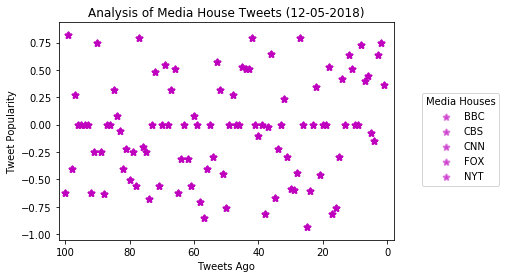

In [13]:
media_house = ("BBC", "CBS", "CNN", "FOX", "NYT")
colors = ("r","b","g","y","m")

for tweets in target_terms:
    x_vals = sentimentDF.loc[target]['Tweets Ago']
    y_vals = sentimentDF.loc[target]['Compound']
    plt.scatter(x_vals, y_vals, marker='*', color=colors[target_terms.index(target)],
               linewidth=2.0, alpha=0.5)
    
now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Analysis of Media House Tweets ({now})")
plt.xlim(102, -2)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Popularity")
plt.legend(media_house, title="Media Houses", loc=9, bbox_to_anchor=(1.2,0.7))

plt.savefig("Sentiment_Scatter.png")
plt.show()

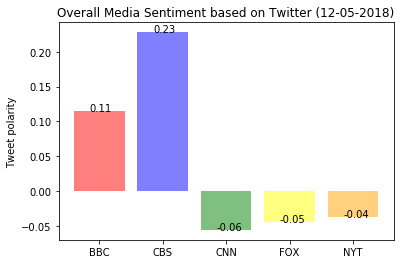

In [8]:
sentiment_means = []
x_axis = np.arange(len(target_terms))

for target in target_terms:
    mean = sentimentDF["Compound"].loc[target].mean()
    sentiment_means.append(mean)
    
plt.bar(x_axis, sentiment_means, color=colors, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, media_house)

now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet polarity")

formatted_sentiment_means = ["%.2f" % sentiment for sentiment in sentiment_means]
for i in range(len(x_axis)):
    plt.text(x = x_axis[i]-0.15, y = sentiment_means[i], s = formatted_sentiment_means[i], size=10)
    
plt.tight_layout

plt.savefig("Sentiment_bar.png")
plt.show()

In [9]:
print("Observations")
print("************************")
print("Observation 1:")
print("CBS has the most positive compound score of the five media houses.")

print("************************")
print("Observation 2:")
print("FOX and NYT have the most negative compound scores")

Observations
************************
Observation 1:
CBS has the most positive compound score of the five media houses.
************************
Observation 2:
FOX and NYT have the most negative compound scores
